<h3>Задание 1</h3>

Я взяла 12 фэнтези книг с сайта lib.ru. Сначала приводим к нижнему регистру, токенизируем текст, удаляем стоп слова, делим предложения с помощью sent_tokenize, удаляем все знаки препинания, лемматизируем и записываем финальный результат в файл


In [4]:
#импортируем нужные библиотеки
import re
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymystem3 import Mystem
m = Mystem()



file = open('a_text.txt' , 'w+', encoding='utf-8')
fantasy_books = ["1.txt", "2.txt", "3.txt", "4.txt", "5.txt",
                 "6.txt", "7.txt", "8.txt", "9.txt", "10.txt",
                 "11.txt", "12.txt"]
for book in fantasy_books:
    with open(book, encoding='utf-8') as f:
        full_book = f.read()
        text = full_book.lower()
        tokens = word_tokenize(text)
        russian_stopwords = stopwords.words("russian")
        filtered_words = [word for word in tokens if word not in russian_stopwords]
        f_text = ' '.join(filtered_words)
        sentences = sent_tokenize(f_text)
        a_text = '\n'.join(sentences)
        a_text = re.sub(r'[.,"\'-?:!";^*{}«»()—`]', '', a_text)
        lemmas = m.lemmatize(a_text)
        m_text = ''.join(lemmas)
        file.write(m_text)


file.close()

<h3>Задание 2</h3>

Давайте теперь обучим собственную модель со следующими параметрами: размер вектора 300, минимальное количество вхождений 5, окно 5, количество итераций 50

In [133]:
import gensim
import logging
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')


logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
f = 'a_text.txt'
data = gensim.models.word2vec.LineSentence(f)
model_test = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=5, epochs=50)
model_test.init_sims(replace=True)
model_path = "h_model.bin"

print("Saving model...")
model_test.wv.save_word2vec_format(model_path, binary=True)

print(sorted([w for w in model_test.wv.key_to_index]))

2022-11-22 22:09:11,301 : INFO : collecting all words and their counts
2022-11-22 22:09:11,301 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-22 22:09:11,346 : INFO : PROGRESS: at sentence #10000, processed 72149 words, keeping 11479 word types
2022-11-22 22:09:11,369 : INFO : PROGRESS: at sentence #20000, processed 133097 words, keeping 17423 word types
2022-11-22 22:09:11,394 : INFO : PROGRESS: at sentence #30000, processed 207746 words, keeping 20743 word types
2022-11-22 22:09:11,416 : INFO : PROGRESS: at sentence #40000, processed 267972 words, keeping 22884 word types
2022-11-22 22:09:11,442 : INFO : PROGRESS: at sentence #50000, processed 328947 words, keeping 26359 word types
2022-11-22 22:09:11,444 : INFO : collected 26670 word types from a corpus of 333537 raw words and 50603 sentences
2022-11-22 22:09:11,445 : INFO : Creating a fresh vocabulary
2022-11-22 22:09:11,462 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains

2022-11-22 22:09:14,585 : INFO : EPOCH - 13 : training on 333537 raw words (294838 effective words) took 0.2s, 1533500 effective words/s
2022-11-22 22:09:14,748 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-11-22 22:09:14,764 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-11-22 22:09:14,768 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-11-22 22:09:14,769 : INFO : EPOCH - 14 : training on 333537 raw words (294887 effective words) took 0.2s, 1615109 effective words/s
2022-11-22 22:09:14,946 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-11-22 22:09:14,946 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-11-22 22:09:14,951 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-11-22 22:09:14,952 : INFO : EPOCH - 15 : training on 333537 raw words (294808 effective words) took 0.2s, 1621732 effective words/s
2022-11-22 22:09:15,115 : INFO : worker thr

2022-11-22 22:09:18,749 : INFO : EPOCH - 33 : training on 333537 raw words (294773 effective words) took 0.2s, 1549371 effective words/s
2022-11-22 22:09:18,923 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-11-22 22:09:18,933 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-11-22 22:09:18,935 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-11-22 22:09:18,935 : INFO : EPOCH - 34 : training on 333537 raw words (294957 effective words) took 0.2s, 1595879 effective words/s
2022-11-22 22:09:19,106 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-11-22 22:09:19,106 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-11-22 22:09:19,119 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-11-22 22:09:19,120 : INFO : EPOCH - 35 : training on 333537 raw words (294859 effective words) took 0.2s, 1606331 effective words/s
2022-11-22 22:09:19,289 : INFO : worker thr

Saving model...
['\x16', 'а', 'аа', 'або', 'абориген', 'абсолютно', 'абсолютный', 'абстрактный', 'август', 'автобус', 'автовокзал', 'автомат', 'автоматически', 'автоматический', 'автомобиль', 'автопилот', 'автор', 'авторитет', 'авторучка', 'ага', 'агент', 'агня', 'агония', 'агрессивный', 'агрессия', 'ад', 'адвокат', 'административный', 'адмирал', 'адрес', 'аж', 'азарт', 'азия', 'азот', 'аида', 'академия', 'аквариум', 'аккуратно', 'аккуратный', 'акт', 'актер', 'активно', 'активность', 'активный', 'акула', 'акция', 'алевтина', 'александр', 'александра', 'александрович', 'александровна', 'алексей', 'аленка', 'алкаш', 'алла', 'аллея', 'алма', 'альбахр', 'альбом', 'альваххаб', 'альдевег', 'альтаир', 'амбар', 'америка', 'американец', 'американский', 'амиров', 'амнезия', 'анализ', 'анатолий', 'ангар', 'ангара', 'ангел', 'ангельский', 'английский', 'англичанин', 'англия', 'андреас', 'андреевич', 'андреевна', 'андрей', 'анекдот', 'анна', 'анри', 'антарктида', 'антонович', 'анхель', 'анхэ', 'аня

In [20]:
#посмотрим сколько слов в нашей модели
print(len(model_test.wv.key_to_index))

9061


Получаем, что в нашей модели 9061 слово. Думаю, что для модели это очень мало. На сайте rusvectores модели содержат около 200 тысяч слов и больше.

Найдите ближайшие 10 слов для: абстрактного понятия, имени героя, прилагательных хороший и плохой (или других антонимов)

In [144]:
print(model_test.wv.most_similar("разочарование", topn=10)) #для абстрактных понятий 

[('превосходство', 0.4935123324394226), ('симпатия', 0.48124414682388306), ('спазм', 0.47782981395721436), ('явный', 0.46539777517318726), ('предчувствие', 0.4439985454082489), ('чреватый', 0.4383332133293152), ('ощущать', 0.4245472550392151), ('выражать', 0.41925758123397827), ('радужный', 0.4182533621788025), ('формула', 0.415985107421875)]


In [155]:
print(model_test.wv.most_similar("игорь", topn=10)) #для имен героев

[('красавчик', 0.570168673992157), ('копылов', 0.5109246969223022), ('майор', 0.4999895989894867), ('проигнорировать', 0.4915469288825989), ('калариос', 0.4884311556816101), ('серов', 0.48245716094970703), ('понадеяться', 0.4795040786266327), ('вероника', 0.47382429242134094), ('раиса', 0.4230700135231018), ('аня', 0.41626137495040894)]


In [162]:
print(model_test.wv.most_similar("темный", topn=10)) #для антонимов

[('светиться', 0.5671819448471069), ('тополь', 0.5146574974060059), ('мерцать', 0.5145352482795715), ('пронизывать', 0.4993797838687897), ('полумрак', 0.46957629919052124), ('виднеться', 0.4652177691459656), ('тропический', 0.45932915806770325), ('немигающий', 0.4560404419898987), ('излучать', 0.455596387386322), ('терраса', 0.4533688426017761)]


In [163]:
print(model_test.wv.most_similar("ясный", topn=10))

[('понятный', 0.42092978954315186), ('обстоять', 0.4187401533126831), ('постчеловечество', 0.4021577835083008), ('прозвучать', 0.3810819983482361), ('нехороший', 0.3683087229728699), ('красиво', 0.36642783880233765), ('просматриваться', 0.3639551103115082), ('пирамида', 0.35402143001556396), ('предвещать', 0.3457087278366089), ('ужалить', 0.34275275468826294)]


Для абстрактных понятий модель вывела слова, которые было ожидаемо увидеть(глаголы, которые характерны для "разочарования", спазм и симпатия, которые обычно употребляются с "разочарованием", прилагательное "чреватый"), но слово "формула" было неожиданным. 
Для имен героев модель вывела фамилия героя, его род деятельности, "красавчик", глаголы и имена других героев. Думаю, что результат был ожидаемый. 
Для прилагательного "темный" вышли слова, связанные со светом и освещением и глаголы как "пронизывать", "виднеться", "излучать". Неожиданным было слово "терраса". Для прилагательного "ясный" вышел его синоним "понятный", глаголы "предвещать", "обстоять", и сущ "постчеловечество". Думаю, что они все связаны с будущим, а обычно говорят "ясное будущее". Но глагол "ужалить" было неожиданным. Глагол "прозвучать" думаю вполне нормально, говорят "прозвучал ясный ответ". Слова "красиво", "нехороший" были неожиданными

Думаю, что наш корпус хоть и маленький, но выводит слова, которые мы ожидаем, но есть места, где модель может вывести слова, которые будут неожиданнными. 

Наша модель вывела слово "очаровательный" как лишнее слово в ряду. Я думаю, что наша модель не ошиблась, так как "очаровательный" точно является лишнем в ряду. 

In [10]:
print(model_test.wv.doesnt_match('чудовищный безжалостный кровожадный очаровательный'.split()))

очаровательный


<h3>Задание 3.1</h3>

Пункт№2. Я скачала модель с сайта rusvectores и взяла следующую семантическую пропорцию: дружба_NOUN - предательство_NOUN + любовь_NOUN = привязанность_NOUN

In [6]:
from gensim.models import KeyedVectors


model = KeyedVectors.load_word2vec_format('model.bin', binary=True)
words = ["дружба_NOUN", "любовь_NOUN", "предательство_NOUN", "привязанность_NOUN"]
for word in words:
    if word in model:
        print(word)
        print(model[word][:10])
        for i in model.most_similar(positive=[word], topn=10):
            print(i[0], i[1])
        print('\n')
    else:
        print('Увы, слова "%s" нет в модели!' % word)

print(model.most_similar(positive=['дружба_NOUN', 'любовь_NOUN'], negative=['предательство_NOUN'])[0][0])

2022-11-20 18:07:00,079 : INFO : loading projection weights from model.bin
2022-11-20 18:07:01,100 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (249333, 300) matrix of type float32 from model.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-11-20T18:07:01.100210', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'load_word2vec_format'}


дружба_NOUN
[-2.4144492  -1.573204   -2.4068325  -2.8043554   1.7097445   2.105105
  4.7409143  -1.7440215  -1.048951    0.22547463]
дружеский_ADJ 0.6475184559822083
приязнь_NOUN 0.6386978030204773
дружество_NOUN 0.6339368224143982
дружба_ADJ 0.5792686343193054
любовь_NOUN 0.5600025057792664
привязанность_NOUN 0.5582850575447083
единение_NOUN 0.5097068548202515
дружественный_ADJ 0.5082271099090576
взаимопонимание_NOUN 0.507970929145813
взаимовыручка_NOUN 0.5036089420318604


любовь_NOUN
[-2.7924347 -1.4477063 -1.8646675  1.1999562  1.4564124  3.2598422
  3.0800736  1.335996  -1.109105   1.3278044]
страсть_NOUN 0.7462779879570007
чувство_NOUN 0.6952898502349854
привязанность_NOUN 0.6560229659080505
влюбленность_NOUN 0.6558039784431458
нежность_NOUN 0.6510331630706787
счастье_NOUN 0.6368119716644287
радость_NOUN 0.620854914188385
любить_VERB 0.612057089805603
любви_PROPN 0.6103211045265198
любовь_PROPN 0.6100746393203735


предательство_NOUN
[ 0.14512166  1.1945149  -1.3670518  -0.982611

Получаем следующую семантическую пропорцию: дружба_NOUN - предательство_NOUN + любовь_NOUN = привязанность_NOUN

<h3>Задание 3.1</h3>

Пункт№3. Сделаем визуализацию с помощью PCA для абстрактных понятий таких как дружба, любовь, предательство, привязанность, одержимость, доверие, честность. Загрузим их в модель и построим.

In [5]:
#импортируем нужные библиотеки
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

2022-11-20 20:46:53,923 : INFO : loading projection weights from model.bin
2022-11-20 20:46:56,462 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (249333, 300) matrix of type float32 from model.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-11-20T20:46:56.462304', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'load_word2vec_format'}


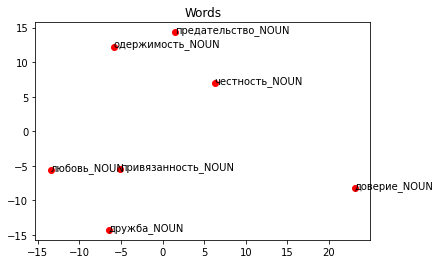

In [33]:
model = KeyedVectors.load_word2vec_format('model.bin', binary=True)
words = ["дружба_NOUN", "любовь_NOUN", "предательство_NOUN",
         "привязанность_NOUN", "одержимость_NOUN", "доверие_NOUN", "честность_NOUN"]
X = model[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

<h3>Задание 3.1</h3>

Пункт№4. Возьмем предложение: "В тихий день играет между деревьями жёлтая музыка и слышно как поют птицы"

In [29]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
model = KeyedVectors.load_word2vec_format('model.bin', binary=True)
sentence = "Девочка гуляла в саду со своей собакой в красивом ярко желтом костюме"
sentence = sentence.lower()
sentence = re.sub(r'[.,"\'-?:!;{}]', '', sentence)
lemmas = m.lemmatize(sentence)
text = "".join(lemmas)
words = text.split()

dct = []
for word in words:
    if "NOUN" in morph.parse(word)[0].tag:
        word = word+'_'+'NOUN'
        word = model.most_similar(word)[0][0]
        dct.append(word)
    if "ADJF" in morph.parse(word)[0].tag:
        word = word + '_' + 'ADJ'
        word = model.most_similar(word)[0][0]
        dct.append(word)
    if "ADJS" in morph.parse(word)[0].tag:
        word = word + '_' + 'ADJ'
        word = model.most_similar(word)[0][0]
        dct.append(word)
    if 'INFN' in morph.parse(word)[0].tag:
        word = word + '_' + 'VERB'
        word = model.most_similar(word)[0][0]
        dct.append(word)
    if "PREP" in morph.parse(word)[0].tag:
        dct.append(word)
    if "CONJ" in morph.parse(word)[0].tag:
        dct.append(word)

print(dct)

['мальчик_NOUN', 'прогуливаться_VERB', 'в', 'садик_NOUN', 'со', 'твой_ADJ', 'кошка_NOUN', 'в', 'прекрасный_ADJ', 'синий_ADJ', 'одежда_NOUN']


In [30]:
#уберем теги
dct = ['мальчик_NOUN', 'прогуливаться_VERB', 'в', 'садик_NOUN',
       'со', 'твой_ADJ', 'кошка_NOUN', 'в', 'прекрасный_ADJ', 'синий_ADJ', 'одежда_NOUN']
lst = []
for item in dct:
    item = item.split('_', 1)[0]
    lst.append(item)
print(lst)

['мальчик', 'прогуливаться', 'в', 'садик', 'со', 'твой', 'кошка', 'в', 'прекрасный', 'синий', 'одежда']


Чтобы слова согласововались друг с другом, то вручную заменим время, падежи, число и род у слов, служебные слова не будем изменять

In [31]:
lst = ['мальчик', 'прогуливаться', 'в', 'садик', 'со', 'твой', 'кошка', 'в', 'прекрасный', 'синий', 'одежда']
lst[1] = morph.parse(lst[1])[0].inflect({'sing', 'past'})[0]
lst[3] = morph.parse(lst[3])[0].inflect({'loct'})[0]
lst[4] = lst[4].replace(lst[4], 'c')
lst[5] = morph.parse(lst[5])[0].inflect({'ablt', 'femn'})[0]
lst[6] = morph.parse(lst[6])[0].inflect({'ablt', 'femn'})[0]
lst[8] = morph.parse(lst[8])[0].inflect({'femn', 'loct'})[0]
lst[9] = morph.parse(lst[9])[0].inflect({'femn', 'loct'})[0]
lst[10] = morph.parse(lst[10])[0].inflect({'femn', 'loct'})[0]
print(' '.join(lst))

мальчик прогуливался в садике c твоей кошкой в прекрасной синей одежде


Получаем предложение: "мальчик прогуливался в садике c твоей кошкой в прекрасной синей одежде". звучит вполне естественно 

<h3>Задание 3.2</h3>

Пукнт№1. Воспользуемся библиотекой wikipedia для того, чтобы скачать статьи по истории, по математике, по языкам, по биологии и про страны. Сохраним все статьи отдельно в текстовые файлы

In [ ]:
import wikipedia

wikipedia.set_lang("ru")

articles = ["Брак в Древнем Риме", "Геркуланум", " Иерусалимский храм", "Тушпа","Фестский диск",
            "Берестяные грамоты", "Помпеи", "Парагвайская война", "Пелопоннесская война",
            "Дело Бейлиса" ,"Крымская война", "Манифест о трёхдневной барщине", "Теория игр",
            "Факторный анализ","Табулирование функции","Геометрические закономерности в природе",
            "Машинное обучение", "Математическая статистика", "Чукотско-камчатские языки", "Кавказские языки",
            "Сино-тибетские языки", "Большое Магелланово Облако", "Галактика", " Галактика Андромеды", "Эволюция звёзд",
            "Моллюски", "Гусеница", "Астрариум", "Птицы", "Белки","Бактерии", "Синий кит"," Ленинградская фонологическая школа",
            "Русское личное имя", "Шёлковая акула"]

print(len(articles))
for article in articles:
    f = open(article+ ".txt", "w+", encoding='utf-8')
    f.write(wikipedia.page(article).content)
    f.close()

35


Теперь вытащим все текстовые файлы из папки wikipedia_artciles и откроем их в режиме чтения. Токенизируем текст и проведем лемматизацию с помощью pymoprhy2

In [1]:
import os
import re
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


path_to_articles = "C:/Users/Abina Kukanova/PycharmProjects/homework/wikipedia_articles"
articles = [os.path.join(path_to_articles, item)
            for item in os.listdir(path_to_articles)
            if item.endswith(".txt")]

articles_texts = []

for article_path in articles:
    with open(article_path, "r", encoding="utf-8") as a_src:
        articles_texts.append("\n".join(a_src.readlines()))

articles_preprocessed = []
for a_text in articles_texts:
    a_text = a_text.lower()
    a_text = re.sub(r'[.,"\'-?:!";^*%{}⊙\\«»—(―)−`]', '', a_text)
    a_tokens = word_tokenize(a_text)
    russian_stopwords = stopwords.words("russian")
    filtered_words = [word for word in a_tokens if word not in russian_stopwords]
    a_lemmatized = " ".join([morph.parse(item)[0].normal_form for item in filtered_words])
    articles_preprocessed.append(a_lemmatized)

print(articles_preprocessed)

['иерусали́мский храм ивр \u200fבֵּית הַמִּקְדָּשׁ\u200f\u200e бейт хамикдаша дом святость ивр \u200fמִּקְדָּשׁ\u200f\u200e микдаша культовый сооружение который являться центр религиозный жизнь еврейский народ x век н э i век н э храм располагаться храмовый гора ивр \u200fהַר הַבַּיִת\u200f\u200e хара абаит иерусалим место сегодня находиться мусульманский святыня куббат ассахра купол скала служить единственный разрешить создание храм место жертвоприношение единый бог который приноситься коэн левит ранее жертва мочь приноситься другой место смотреть быт ряд другой место писание храм являться также объект паломничество еврей раз год пес пасха шавуот пятидесятница суккот праздник куща согласно библия временной храм исход еврей египет строительство храм иерусалим служить переносный скиния собрание иерусалимский храм представлять себя здание это отличаться жертвенник открытый святилище бама храм находиться предмет символизировать присутствие бог ковчег завет скрижаль завет херувим также утв

<h3>Задание 3.2</h3>

Пукнт№2.Постройте TF-IDF для статей. Параметры от 1 до 3 слов (`ngram_range=(1,3)`), встретились минимум 3 раза (`min_df=3`).

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


stops = stopwords.words("russian")
tfidf = TfidfVectorizer(analyzer="word", stop_words=stops, ngram_range=(1,3),min_df=3)

articles_tfidf = tfidf.fit_transform(articles_preprocessed)
print(f"Матрица на {articles_tfidf.shape[0]} документов и {articles_tfidf.shape[1]} термов")

Матрица на 35 документов и 5911 термов


<h3>Задание 3.2</h3>

Пункт№3. Выделите для статей ключевые слова, покажите их и оцените, насколько это соответствует их содержанию и вашим ожиданиям.

In [3]:
import numpy as np


def get_top_tf_idf_words(tfidf_vector, feature_names, top_n):
    sorted_nzs = np.argsort(tfidf_vector.data)[:-(top_n+1):-1]
    return feature_names[tfidf_vector.indices[sorted_nzs]]

feature_names = np.array(tfidf.get_feature_names_out())

for i, article in enumerate(articles_texts):
    # напечатаем только первые 5 статей
    if i < 5:
        article_vector = articles_tfidf[i, :]
        words = get_top_tf_idf_words(article_vector, feature_names, 10)
        #print(article)
        print(words)

['храм' 'год' 'который' 'святилище' 'строительство' 'гора' 'царь' 'святой'
 'место' 'бог']
['фонема' 'язык' 'позиция' 'фонетический' 'чередование' 'русский'
 'фонетика' 'звук' 'русский язык' 'единица']
['планета' 'часы' 'де' 'луна' 'год' 'движение' 'час' 'механизм' 'диск'
 'астрономический']
['бактерия' 'клетка' 'бактериальный' 'который' 'клеточный' 'рост'
 'питательный вещество' 'питательный' 'вещество' 'вид']
['белок' 'белка' 'клетка' 'аминокислота' 'структура' 'фермент' 'молекула'
 'организм' 'остаток' 'синтез']


Я думаю, что ключевые слова, которые мы получили отражают тематику статей. Например, я брала статью по биологии и вот какие слова получились: 'бактерия' 'клетка' 'бактериальный' 'который' 'клеточный' 'рост' 'питательный' 'питательный вещество' 'вещество' 'вид'. Такой же результат и получился со статьями про галактику, языки и так далее. 

<h3>Задание 3.2</h3>

Пукнт№4. С помощью PCA визуализируйте TF-IDF вектора текстов (как в семантике, просто вместо семантических векторов tf-idf)

C:\Users\Abina Kukanova\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


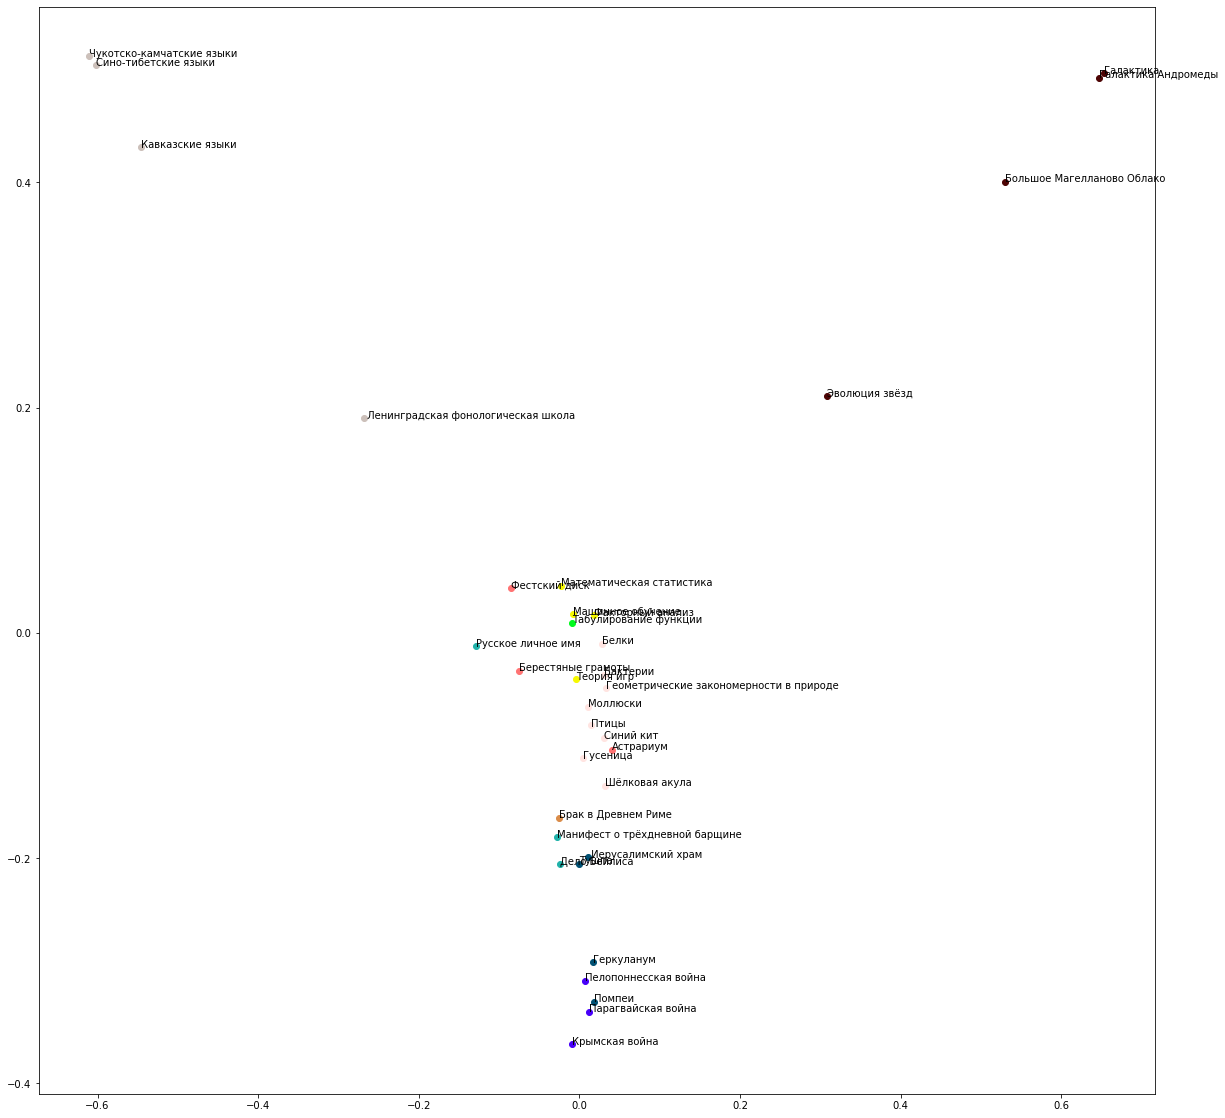

In [6]:
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt
num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations
)

labels = clustering_model.fit_predict(articles_tfidf)
X = articles_tfidf.todense()
pca = PCA(n_components=2)
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)

fig, ax = plt.subplots(figsize = (20, 20))
for index, instance in enumerate(articles):
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
    plt.annotate(Path(articles[index]).stem, xy=(pca_comp_1, pca_comp_2))
plt.show()

Каждая точка на графике подписана своим же названием статьи, поэтому мы можем проверить и посмотреть, какая это статья. 

Видим, что статьи "Галактика" и "Галактика Андромеды" находятся близко друг другу, так как оба относятся к одной и той же теме про галактику. Статья про Большое Магелланово Облако находится чуть дальше от этих статей, и с ней рядом статья про Эволюцию звезд находится рядом. Получается, что статьи про астрономию находится рядом. 

Статьи (чукотско-камчатские и синно-тебетские языке) тоже находятся близко друг другу, так как относятся к языкам. Рядом с этими статьями находится статья про кавказские языки. Cтатья про Ленинградскую фонологическую школу находится чуть дальше.

Статьи про Парагвайскую войну, Пелопоннескую войну и статья про Крымскую войну находятся рядом

Статья про Геркуланум и статья про Помпеи, получается обе статьи про древнеримские города, находятся рядом. 

Получаем, что статьи, которые имеют схожую тематику, находятся близко к друг другу. 

<h3>Задание 4.1</h3>

Я взяла текст про галактику Андромеды, где есть много разных чисел. Зададим параметр token_pattern таким образом, чтобы в словарь не попадали числа. 

In [141]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

with open('Галактика Андромеды.txt', "r", encoding='utf-8') as f:
    text = f.read()

articles_preprocess = []
text = text.lower()
a_tokens = wordpunct_tokenize(text)
stops = stopwords.words("russian")
filtered_words = [word for word in a_tokens if word not in stops]
a_lemmatized = " ".join([morph.parse(item)[0].normal_form for item in filtered_words])
articles_preprocess.append(a_lemmatized)

tfidf = TfidfVectorizer(analyzer='word', stop_words=stops, token_pattern=r'(?u)\b[А-Яа-я]+\b')
articles_tfidf = tfidf.fit_transform(articles_preprocess)
print(tfidf.get_feature_names_out())
print(articles_preprocess) #наш лемматизированный текст 

2022-11-22 22:26:37,837 : INFO : Loading dictionaries from C:\Users\Abina Kukanova\anaconda3\lib\site-packages\pymorphy2_dicts_ru\data
2022-11-22 22:26:37,864 : INFO : format: 2.4, revision: 417127, updated: 2020-10-11T15:05:51.070345


['абсолютный' 'адриан' 'активный' 'альфа' 'аналог' 'англ' 'английский'
 'андром' 'андромеда' 'анонимный' 'анри' 'арп' 'ас' 'ассоциация'
 'астроном' 'астрономический' 'астрономия' 'атомарный' 'баада' 'балдж'
 'балджей' 'бар' 'баттистый' 'белые' 'берг' 'бинокль' 'благодаря' 'блеск'
 'близкий' 'бо' 'болин' 'больший' 'большинство' 'большой' 'бонд' 'будущее'
 'буйо' 'важный' 'вальтер' 'ван' 'вблизи' 'вдвое' 'вдоль' 'век' 'величина'
 'верно' 'верный' 'вероятно' 'вершина' 'весто' 'весь' 'ветвь' 'вещество'
 'взаимодействие' 'вид' 'видимость' 'видимый' 'видный' 'вклад' 'влиять'
 'вне' 'внести' 'внешний' 'вносить' 'внутренний' 'внутри' 'водород'
 'возможно' 'возможный' 'возникнуть' 'возраст' 'войти' 'волна' 'вольф'
 'восточный' 'впервые' 'впоследствии' 'вращение' 'время' 'вспыхивать'
 'вспыхнуть' 'вспышка' 'встречаться' 'второй' 'выбросить' 'вывод'
 'выглядеть' 'выделяться' 'выдержка' 'вызвать' 'вынудить' 'выраженный'
 'высокий' 'выше' 'выяснить' 'выясниться' 'газ' 'газопылевой' 'гала'
 'галакти

<h3>Задание 4.2</h3>

Я создала папку, где собрала статьи на русском языке(они немного философские), подготовим для ti-idf. 

In [4]:
import os
import re
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


path_to_articles = "C:/Users/Abina Kukanova/PycharmProjects/homework/ti_idf"
article = [os.path.join(path_to_articles, item)
            for item in os.listdir(path_to_articles)
            if item.endswith(".txt")]

articlestexts = []

for article_path in article:
    with open(article_path, "r", encoding="utf-8") as a_src:
        articlestexts.append("\n".join(a_src.readlines()))

articlespreprocess_ = []
for a_text in articlestexts:
    a_text = a_text.lower()
    a_text = re.sub(r'[.,"\'-?:!";^*%{}⊙\«»—()−`]', '', a_text)
    a_tokens = word_tokenize(a_text)
    russian_stopwords = stopwords.words("russian")
    filtered_words = [word for word in a_tokens if word not in russian_stopwords]
    a_lemmatized = " ".join([morph.parse(item)[0].normal_form for item in filtered_words])
    articlespreprocess_.append(a_lemmatized)

print(articlespreprocess_)

['бог позволять осуждать говорить знать понимать вера способность дух животное дикарь неразвитый человек страх сомнение доступный высокий организация умно поступать один ум мало человек любить поговорить свой болезнь это самый неинтересный жизнь ясный умственно чистый нравственно опрятный физически дело определяться цель дело называться великий который великий цель какой наслаждение уважать человек видеть книга дело автор любить играть карта видеть изумительный дело добрый человек бывать стыдно собака национальный наука национальный таблица умножение национальный наука лгать грязный человек нужно аршин земля человек труп человек нужный весь земной шар любить какой богатство открывать сколько нежность ласковость вериться уметь любить хороший воспитание пролить соус скатерть заметить это сделать ктонибыть всё говорить читаемый любовь сам мало любим', '…этый правда блестящий период прошлый многий страна индия египет китай греция другой страна многие этот страна отставать регрессировать эт

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform(articlespreprocess_)

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(articlespreprocess_)

tokens = Tfidf_vect.get_feature_names_out()
dta = pd.DataFrame(data = vector_matrix.toarray(),columns = tokens)
print(dta)

   абсурдность   автобус    автор        ай      алин     алина     ангел  \
0     0.000000  0.000000  0.09287  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2     0.059849  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.049829  0.00000  0.000000  0.000000  0.000000  0.058996   
5     0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.00000  0.030809  0.030809  0.646985  0.000000   
7     0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
8     0.000000  0.055944  0.00000  0.000000  0.000000  0.000000  0.000000   

   аплодисменты    аршин  атмосфера  ...  электричество       это      этот  \
0      0.000000  0.09287   0.000000  ...       0.000000  0.071180  0.000000   
1      0.000000  0.00000   0.000000  ...       0.000000  0.029245  0.03

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(dta, dta))

[[1.         0.15788197 0.08531328 0.03404947 0.10848979 0.08532473
  0.03764381 0.21745499 0.15700663]
 [0.15788197 1.         0.20454405 0.0268452  0.09488953 0.03363117
  0.03988049 0.16438205 0.1196249 ]
 [0.08531328 0.20454405 1.         0.03313589 0.10457595 0.05548285
  0.0348765  0.18896301 0.12604535]
 [0.03404947 0.0268452  0.03313589 1.         0.07462275 0.07696697
  0.10172073 0.02927846 0.02552415]
 [0.10848979 0.09488953 0.10457595 0.07462275 1.         0.09617099
  0.06087049 0.11705882 0.09897703]
 [0.08532473 0.03363117 0.05548285 0.07696697 0.09617099 1.
  0.08054094 0.05139375 0.03780444]
 [0.03764381 0.03988049 0.0348765  0.10172073 0.06087049 0.08054094
  1.         0.04731148 0.02439758]
 [0.21745499 0.16438205 0.18896301 0.02927846 0.11705882 0.05139375
  0.04731148 1.         0.26273424]
 [0.15700663 0.1196249  0.12604535 0.02552415 0.09897703 0.03780444
  0.02439758 0.26273424 1.        ]]


In [37]:
from pathlib import Path
import collections
dct = {}
spl = []
for index, arti in enumerate(article):
    vec_sim = cosine_similarity(vector_matrix[0], vector_matrix)
    list_st = vec_sim.tolist()
    dct[list_st[0][index]]=[]
    dct[list_st[0][index]].append(Path(article[index]).stem)
    dct[list_st[0][index]].append(articlestexts[index])
ord = collections.OrderedDict(sorted(dct.items(),reverse=True))
print(ord)
#выведем наш словарь, отсортированный по ключу по убыванию 

OrderedDict([(0.9999999999999999, ['Вера есть дух', 'Боже, не позволяй мне осуждать или говорить о том, чего я не знаю и не понимаю.\n\n\n\n    Вера есть способность духа. У животных ее нет, у дикарей и неразвитых людей - страх и сомнение. Она доступна только высоким организациям*.\n\n\n\n    Чтобы умно поступать, одного ума мало.\n\n\n\n    Человек любит поговорить о своих болезнях, а между тем это самое неинтересное в его жизни.\n\n\n\n    Надо быть ясным умственно, чистым нравственно и опрятным физически.\n\n\n\n    Дела определяются их целями; то дело называется великим, у которого великая цель.\n\n\n\n    Какое наслаждение уважать людей! Когда я вижу книги, мне нет дела до того, как авторы любили, играли в карты, я вижу только их изумительные дела.\n\n\n\n    Доброму человеку бывает стыдно даже перед собакой.\n\n\n\n    Национальной науки нет, как нет национальной таблицы умножения; что же национально, то уже не наука.\n\n\n\n    Кто лжёт, тот грязен.\n\n\n\n- Человеку нужно три а

<h3>Задание 4.3</h3>



In [42]:
import seaborn as sb 
import matplotlib as plt
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels

In [38]:
path_to_articles = "C:/Users/Abina Kukanova/PycharmProjects/homework/ti_idf"
article = [os.path.join(path_to_articles, item)
            for item in os.listdir(path_to_articles)
            if item.endswith(".txt")]

spk = []
for index, arc in enumerate(article):
    spk.append(Path(article[index]).stem)
    
rtd = pd.DataFrame(data = vector_matrix.toarray(),columns = tokens, index=spk)
print(spk) 

print(rtd)

['Вера есть дух', 'Мир велик', 'Мир вокруг нас', 'Нож', 'Письмо дочери', 'Сказка о Лисе', 'Сказка об Алине', 'Цель в жизни', 'Человек']
                 абсурдность   автобус    автор        ай      алин     алина  \
Вера есть дух       0.000000  0.000000  0.09287  0.000000  0.000000  0.000000   
Мир велик           0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
Мир вокруг нас      0.059849  0.000000  0.00000  0.000000  0.000000  0.000000   
Нож                 0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
Письмо дочери       0.000000  0.049829  0.00000  0.000000  0.000000  0.000000   
Сказка о Лисе       0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
Сказка об Алине     0.000000  0.000000  0.00000  0.030809  0.030809  0.646985   
Цель в жизни        0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
Человек             0.000000  0.055944  0.00000  0.000000  0.000000  0.000000   

                    ангел  аплодисменты    аршин  атм

In [44]:
art = pd.DataFrame(data = abn ,index = spk, columns = spk)
print(art)

                 Вера есть дух     Мир велик  Мир вокруг нас           Нож  \
Вера есть дух     2.980232e-08  1.297781e+00        1.352543  1.389928e+00   
Мир велик         1.297781e+00  2.107342e-08        1.261314  1.395102e+00   
Мир вокруг нас    1.352543e+00  1.261314e+00        0.000000  1.390586e+00   
Нож               1.389928e+00  1.395102e+00        1.390586  2.107342e-08   
Письмо дочери     1.335298e+00  1.345445e+00        1.338226  1.360424e+00   
Сказка о Лисе     1.352535e+00  1.390229e+00        1.374421  1.358700e+00   
Сказка об Алине   1.387340e+00  1.385727e+00        1.389333  1.340358e+00   
Цель в жизни      1.251036e+00  1.292763e+00        1.273607  1.393357e+00   
Человек           1.298456e+00  1.326933e+00        1.322085  1.396049e+00   

                 Письмо дочери  Сказка о Лисе  Сказка об Алине  Цель в жизни  \
Вера есть дух         1.335298       1.352535     1.387340e+00      1.251036   
Мир велик             1.345445       1.390229     1.385727e

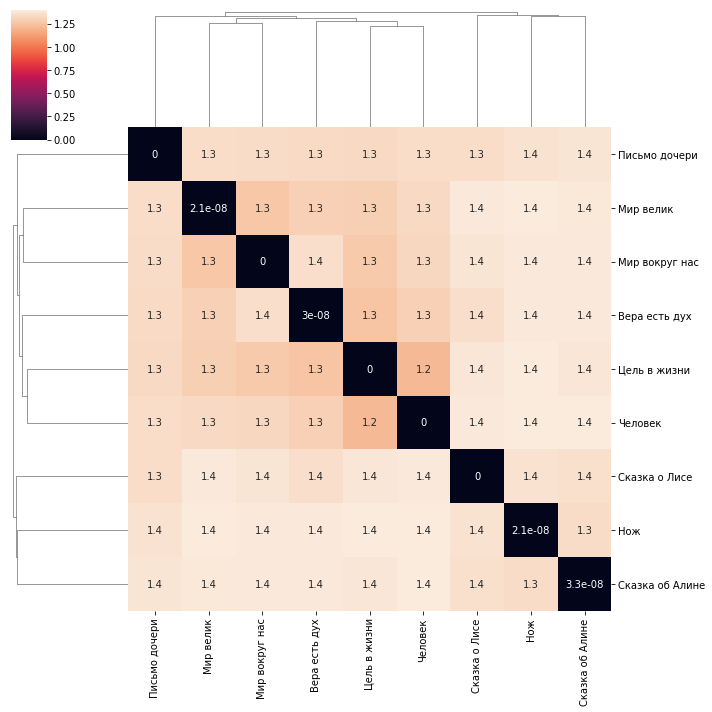

In [43]:
sb.clustermap(art, annot=True)

Думаю, что результат получился адекватным. Например, что места, которые заполнены черным цветом, показывают, что это и есть та статья. Далее, текст про человека и его цели в жизни(текст "Цель в жизни") и  каким должен быть человек(текст "Человек") сгруппированы верно, так как сверху можно посмотреть на датафрейм и сравнить, правильно или нет. У нас все совпадает. 